# Importaion et visualisation des données

In [27]:
import numpy as np  # algèbre linéaire
import pandas as pd  # traitement des données, entrée/sortie de fichiers CSV (par exemple, pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Bibliothèques de classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Autres Bibliothèques
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold


In [28]:
# Chargement du Dataset
df = pd.read_csv('data/exam/creditcard.csv')  # Charger le fichier CSV dans un DataFrame pandas
df.head()  # Afficher les premières lignes du DataFrame pour vérifier le chargement

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.describe()  # Afficher les statistiques récapitulatives des données


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
df.isnull().sum()  # Vérifier s'il y a des valeurs manquantes dans le DataFrame


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df.columns  # Afficher les noms des colonnes du DataFrame


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
# Afficher la répartition des classes
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')  # Pourcentage de transactions non frauduleuses
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')  # Pourcentage de transactions frauduleuses

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


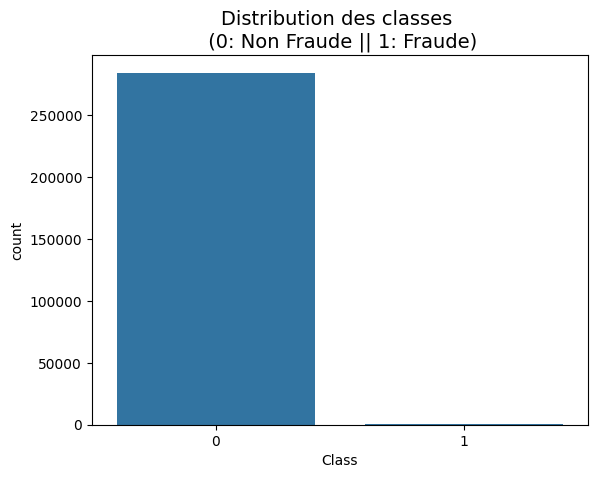

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliser la fonction countplot pour visualiser la distribution des classes
sns.countplot(x='Class', data=df)

# Ajouter un titre au graphique
plt.title('Distribution des classes \n (0: Non Fraude || 1: Fraude)', fontsize=14)

# Afficher le graphique
plt.show()


C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\4236111095.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\4236111095.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[

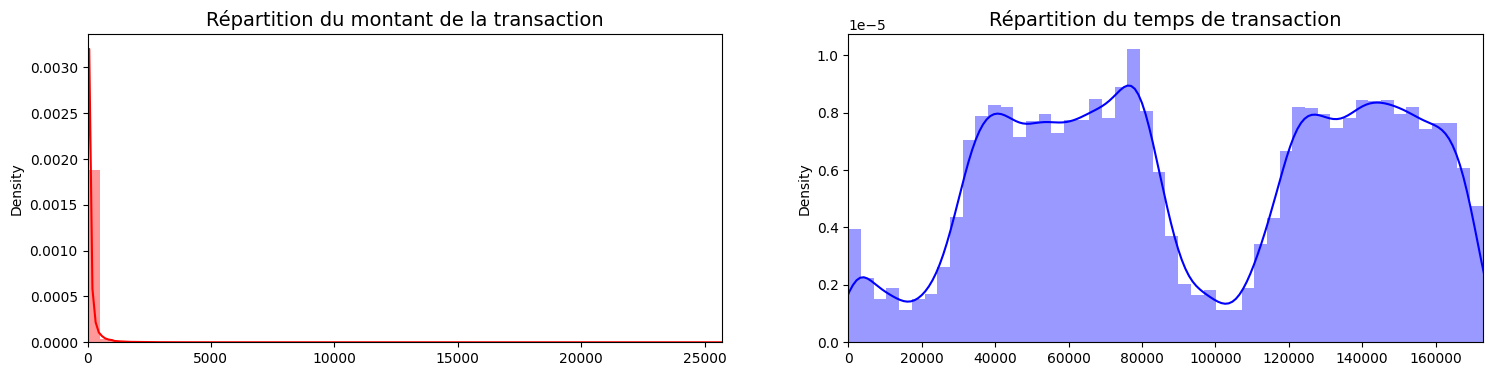

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Répartition du montant de la transaction', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Répartition du temps de transaction', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# Création d'un sous-échantillon de la base de données

#### Un sous-échantillon de la base de données permet d'avoir un nombre égal de cas de fraude et de non-fraude, aidant ainsi nos algorithmes à mieux comprendre les modèles qui déterminent si une transaction est une fraude ou non.Notre sous-échantillon sera une trame de données avec un ratio 50/50 de transactions frauduleuses et non frauduleuses. Cela signifie que notre sous-échantillon comportera le même nombre de transactions frauduleuses et non frauduleuses afin d'eviter le surapprentissage de notre modele

In [35]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [36]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [37]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Pas de fraudes', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% du jeu de données')
print('Fraudes', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% du jeu de données')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Entraînement:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Nous avons déjà X_train et y_train pour les données sous-échantillonnées, c'est pourquoi j'utilise original pour les distinguer et ne pas écraser ces variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifiez la distribution des étiquettes

# Convertir en tableau
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Vérifier si la distribution des étiquettes d'entraînement et de test est similaire
labels_uniques_train, compte_labels_train = np.unique(original_ytrain, return_counts=True)
labels_uniques_test, compte_labels_test = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Distribution des étiquettes : \n')
print(compte_labels_train/ len(original_ytrain))
print(compte_labels_test/ len(original_ytest))


Pas de fraudes 99.83 % du jeu de données
Fraudes 0.17 % du jeu de données
Entraînement: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Entraînement: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Entraînement: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Entraînement: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Entraînement: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Distribution des étiquettes : 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [39]:
# Étant donné que nos classes sont très déséquilibrées, nous devrions les rendre équivalentes afin d'avoir une distribution normale des classes.

# Mélangeons les données avant de créer les sous-échantillons

df = df.sample(frac=1)

# nombre de classes de fraude 492 lignes.
df_fraude = df.loc[df['Class'] == 1]
df_non_fraude = df.loc[df['Class'] == 0][:492]

df_distribue_normalement = pd.concat([df_fraude, df_non_fraude])

# Mélangeons les lignes du dataframe
nouveau_df = df_distribue_normalement.sample(frac=1, random_state=42)

nouveau_df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
217841,2.818696,0.662273,-1.520671,-0.866538,-1.034818,-1.157077,0.529674,1.549244,0.221089,0.756722,...,-0.449621,0.200823,1.062323,-0.099676,-0.786453,-0.595779,0.008781,0.411195,0.028983,0
255556,-0.296653,0.852830,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1
252771,-0.293440,0.837310,2.070510,-0.022300,-1.246776,0.373207,-0.095225,-1.342762,0.200248,-0.384575,...,-0.251475,0.258712,0.914096,0.002561,0.082067,0.249758,-0.104055,-0.016659,-0.057692,0
276864,4.570391,0.970947,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,...,0.650196,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,1
17317,1.089779,-0.658690,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,...,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1


Distribution des classes dans le sous-échantillon de données
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\352931044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=nouveau_df, palette='Set2')  # Spécifier 'x' pour l'argument 'Classe'


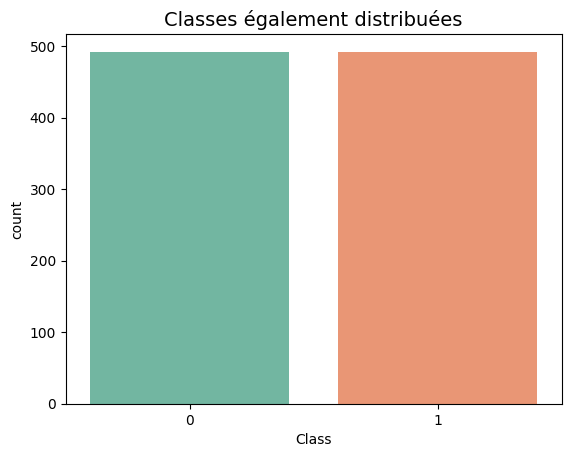

In [40]:
print('Distribution des classes dans le sous-échantillon de données')
print(nouveau_df['Class'].value_counts()/len(nouveau_df))

sns.countplot(x='Class', data=nouveau_df, palette='Set2')  # Spécifier 'x' pour l'argument 'Classe'
plt.title('Classes également distribuées', fontsize=14)
plt.show()


# Correlation

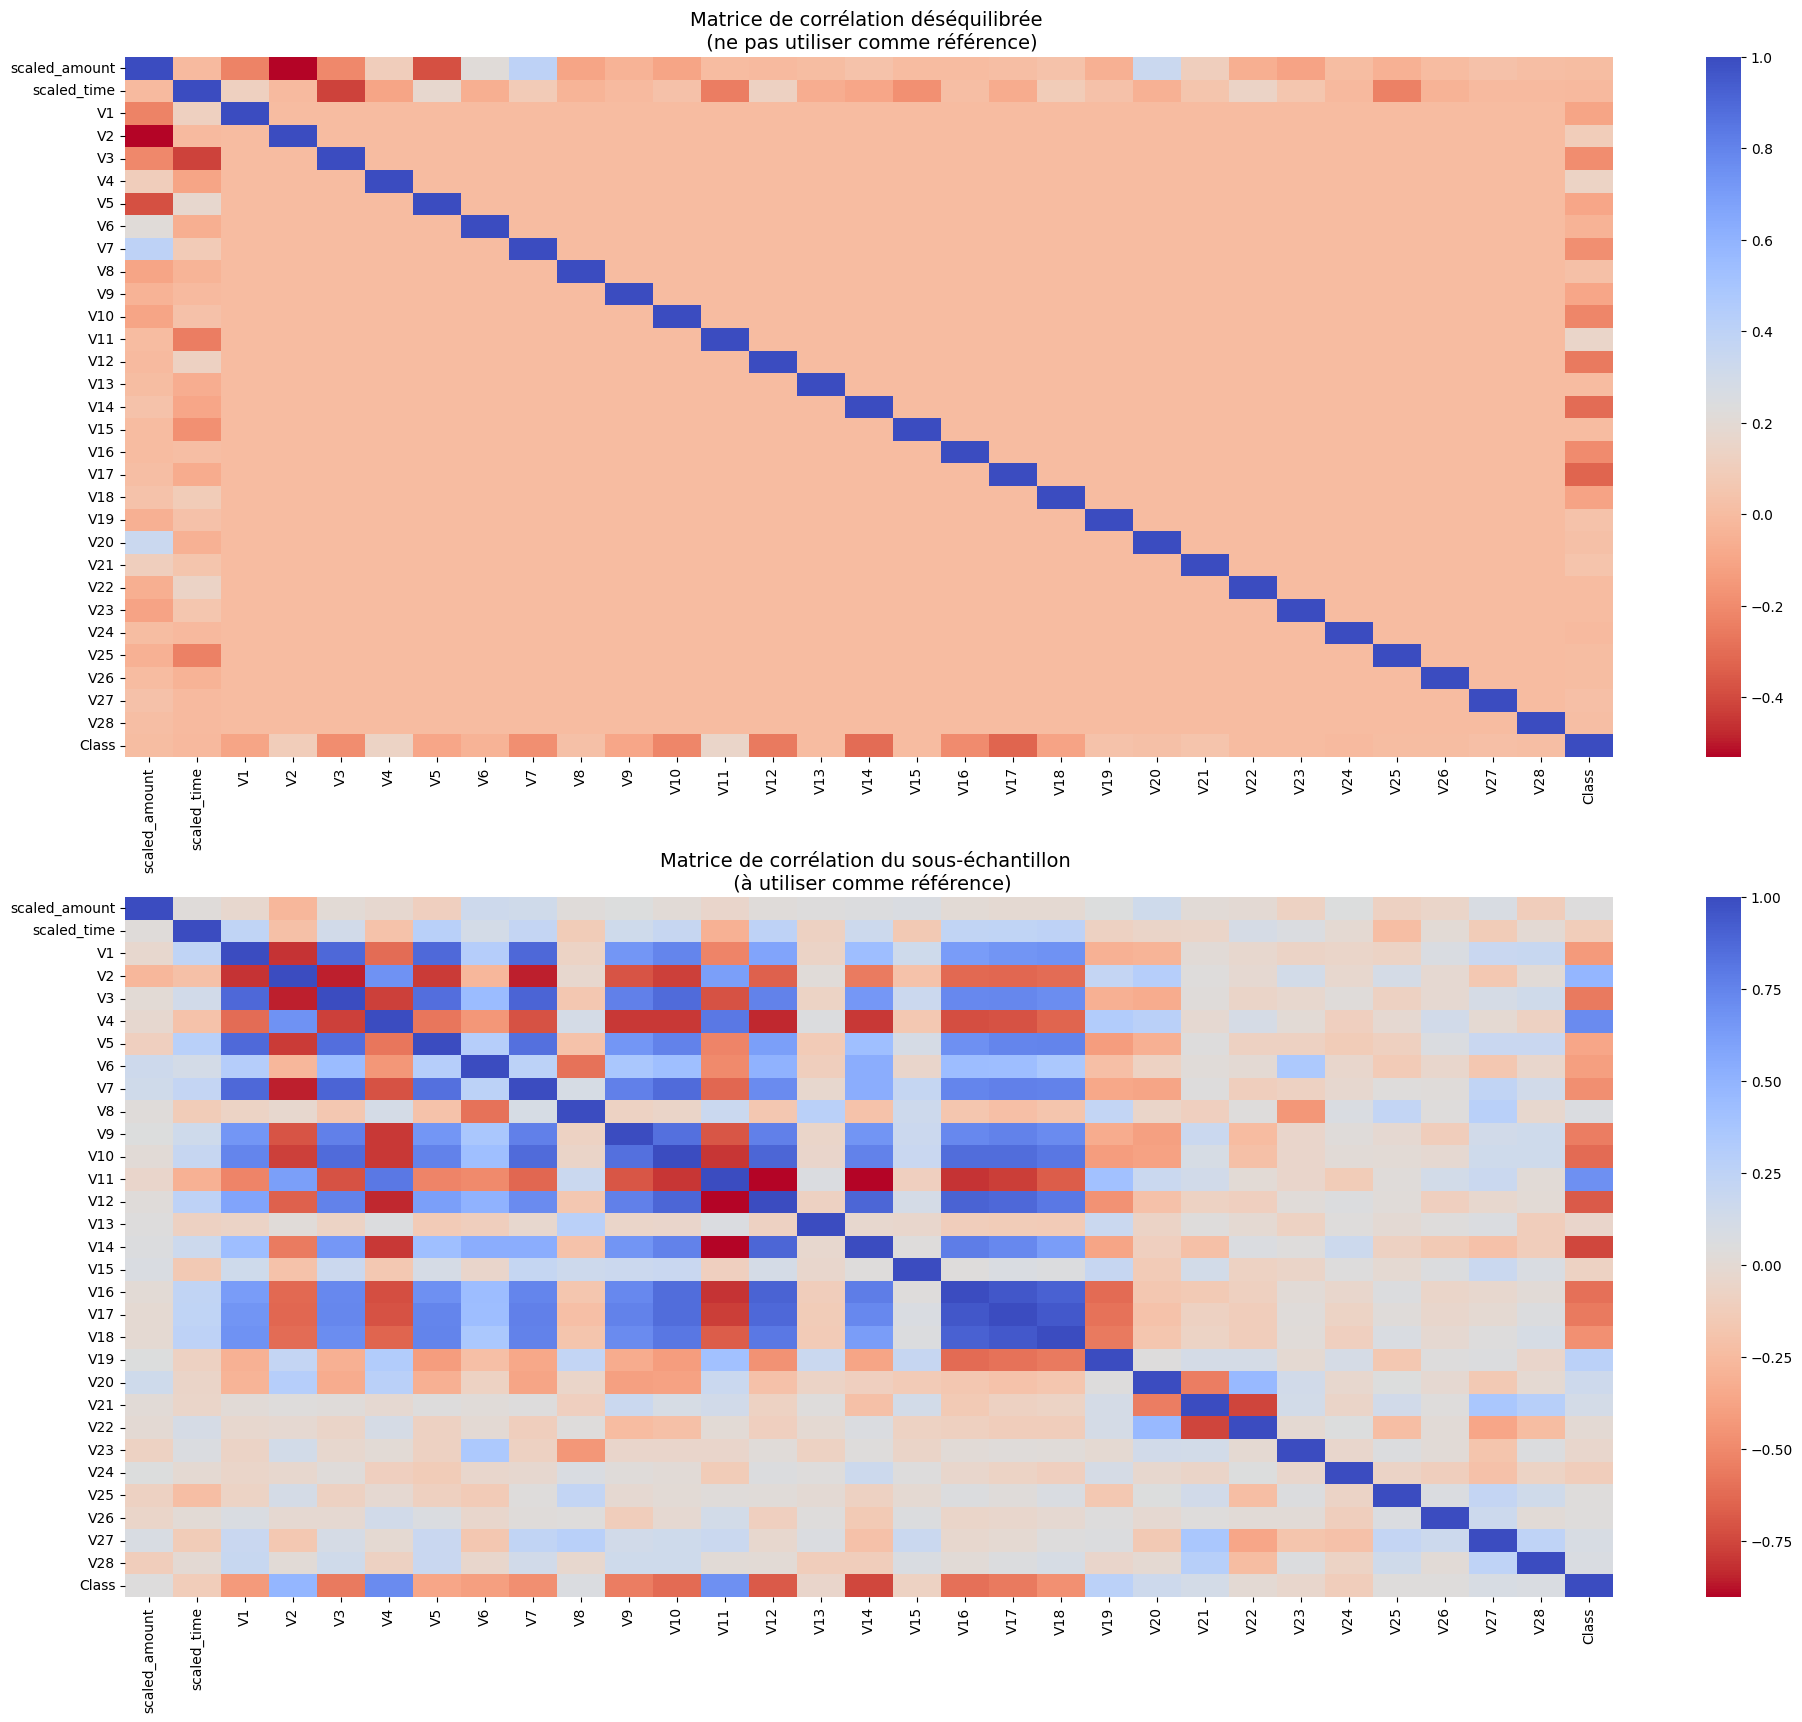

In [41]:
# Assurons-nous d'utiliser le sous-échantillon dans notre corrélation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# DataFrame entier
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matrice de corrélation déséquilibrée \n (ne pas utiliser comme référence)", fontsize=14)


corr_sous_echantillon = nouveau_df.corr()
sns.heatmap(corr_sous_echantillon, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matrice de corrélation du sous-échantillon \n (à utiliser comme référence)', fontsize=14)
plt.show()


C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\2236431161.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=nouveau_df, palette=couleurs, ax=axes[0])
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\2236431161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=nouveau_df, palette=couleurs, ax=axes[1])
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\2236431161.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=nouveau_df, pale

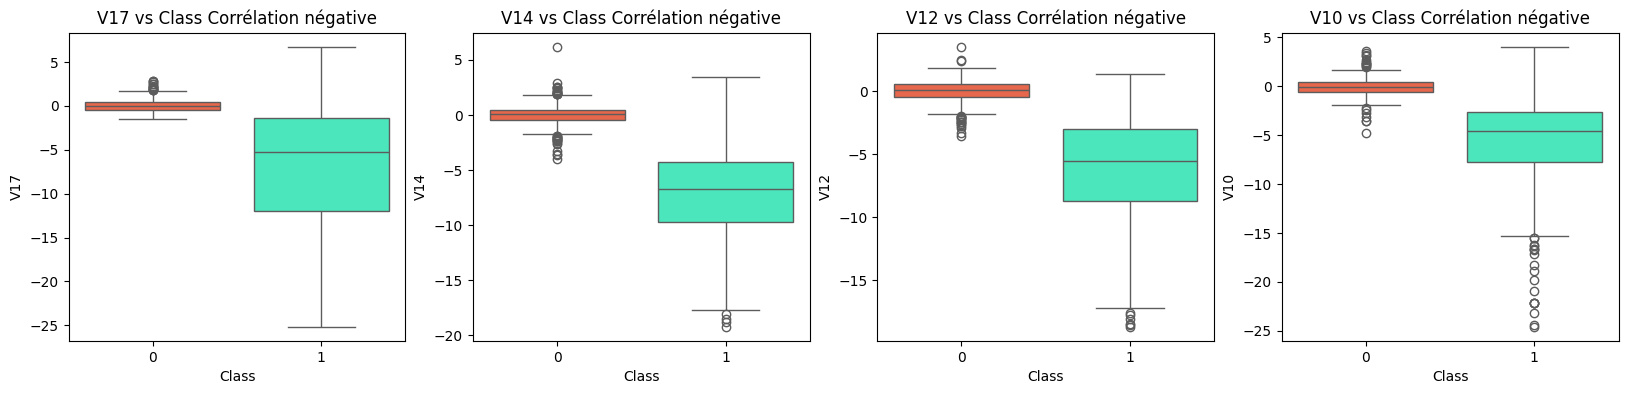

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définition d'une palette de couleurs prédéfinie de seaborn
couleurs = ["#FF5733", "#33FFC7"]

# Création de la figure avec 4 sous-graphiques
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Affichage des boîtes à moustaches pour chaque variable par rapport à la classe
sns.boxplot(x="Class", y="V17", data=nouveau_df, palette=couleurs, ax=axes[0])
axes[0].set_title('V17 vs Class Corrélation négative')

sns.boxplot(x="Class", y="V14", data=nouveau_df, palette=couleurs, ax=axes[1])
axes[1].set_title('V14 vs Class Corrélation négative')

sns.boxplot(x="Class", y="V12", data=nouveau_df, palette=couleurs, ax=axes[2])
axes[2].set_title('V12 vs Class Corrélation négative')

sns.boxplot(x="Class", y="V10", data=nouveau_df, palette=couleurs, ax=axes[3])
axes[3].set_title('V10 vs Class Corrélation négative')

plt.show()


C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3130474824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=nouveau_df, palette=couleurs, ax=axes[0])
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3130474824.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=nouveau_df, palette=couleurs, ax=axes[1])
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3130474824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=nouveau_df, palette=

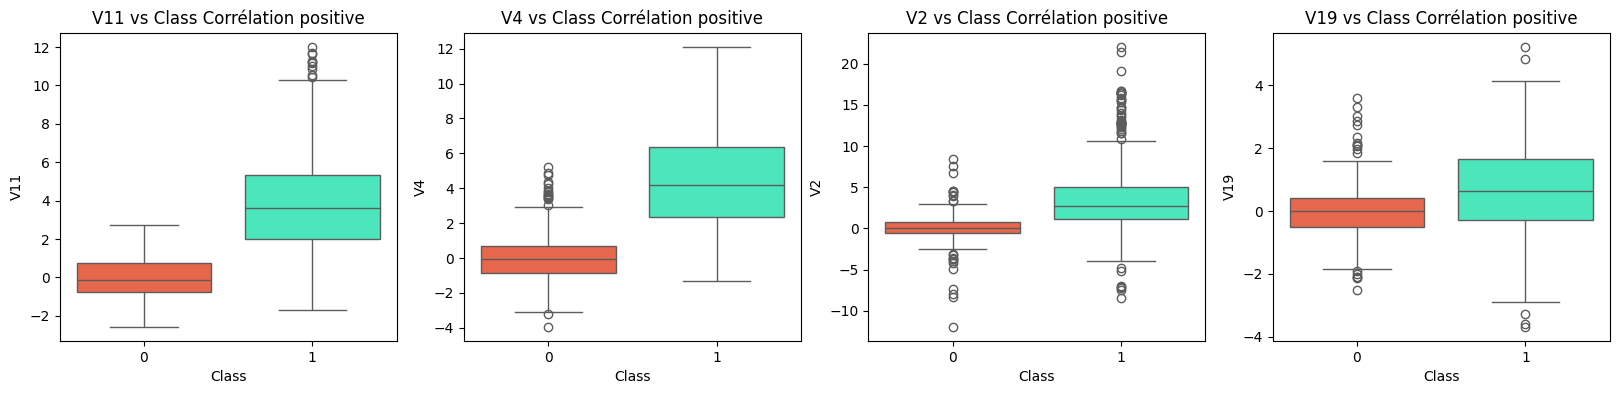

In [43]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Corrélations positives (Plus la caractéristique est élevée, plus la probabilité augmente qu'il s'agisse d'une transaction frauduleuse)
sns.boxplot(x="Class", y="V11", data=nouveau_df, palette=couleurs, ax=axes[0])
axes[0].set_title('V11 vs Class Corrélation positive')

sns.boxplot(x="Class", y="V4", data=nouveau_df, palette=couleurs, ax=axes[1])
axes[1].set_title('V4 vs Class Corrélation positive')

sns.boxplot(x="Class", y="V2", data=nouveau_df, palette=couleurs, ax=axes[2])
axes[2].set_title('V2 vs Class Corrélation positive')

sns.boxplot(x="Class", y="V19", data=nouveau_df, palette=couleurs, ax=axes[3])
axes[3].set_title('V19 vs Class Corrélation positive')

plt.show()


# Suppression des données aberante

C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\2319288941.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distribution_v14_fraude, ax=ax1, fit=norm, color='#FB8861')
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\2319288941.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

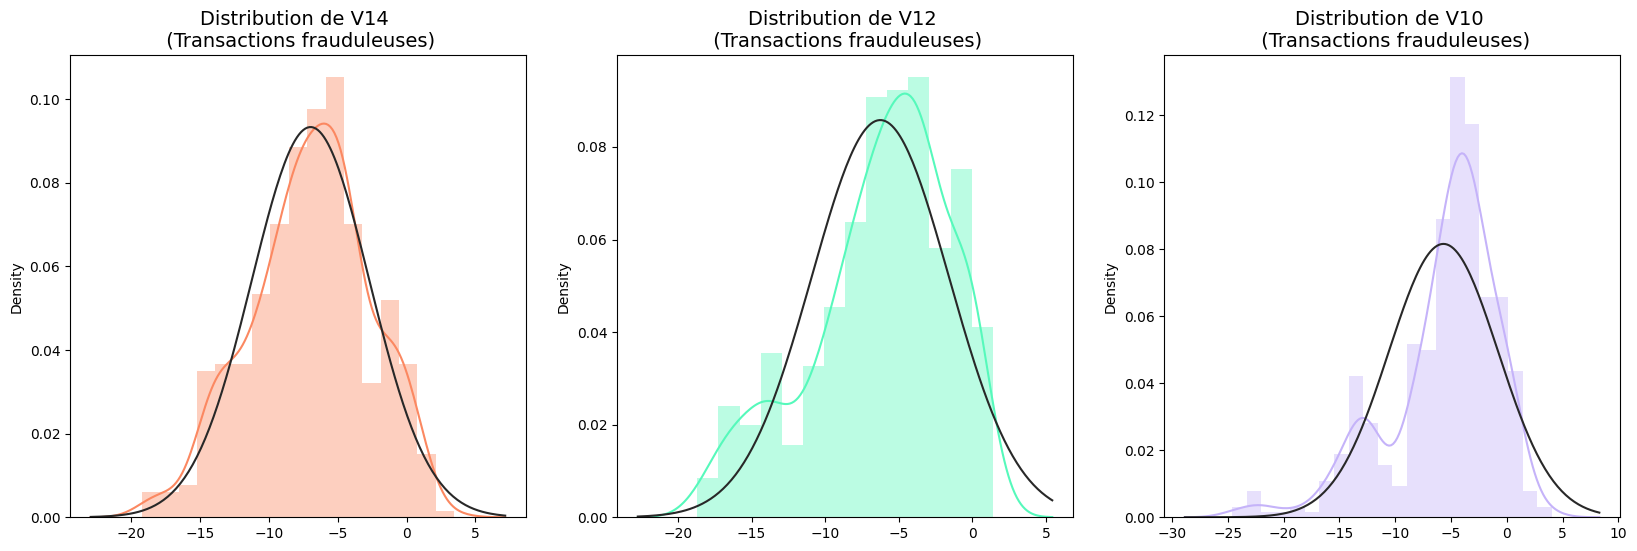

In [44]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

distribution_v14_fraude = nouveau_df['V14'].loc[nouveau_df['Class'] == 1].values
sns.distplot(distribution_v14_fraude, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Distribution de V14 \n (Transactions frauduleuses)', fontsize=14)

distribution_v12_fraude = nouveau_df['V12'].loc[nouveau_df['Class'] == 1].values
sns.distplot(distribution_v12_fraude, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Distribution de V12 \n (Transactions frauduleuses)', fontsize=14)

distribution_v10_fraude = nouveau_df['V10'].loc[nouveau_df['Class'] == 1].values
sns.distplot(distribution_v10_fraude, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Distribution de V10 \n (Transactions frauduleuses)', fontsize=14)

plt.show()


In [45]:
# -----> Suppression des valeurs aberrantes de V14 (la plus fortement corrélée négativement avec les étiquettes)
v14_fraude = nouveau_df['V14'].loc[nouveau_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)
print('Premier quartile : {} | Troisième quartile : {}'.format(q25, q75))
iqr_v14 = q75 - q25
print('IQR : {}'.format(iqr_v14))

seuil_coupe_v14 = iqr_v14 * 1.5
v14_inferieur, v14_superieur = q25 - seuil_coupe_v14, q75 + seuil_coupe_v14
print('Seuil de coupure : {}'.format(seuil_coupe_v14))
print('V14 inférieur : {}'.format(v14_inferieur))
print('V14 supérieur : {}'.format(v14_superieur))

valeurs_aberrantes = [x for x in v14_fraude if x < v14_inferieur or x > v14_superieur]
print('Valeurs aberrantes de la caractéristique V14 pour les cas de fraude : {}'.format(len(valeurs_aberrantes)))
print('Valeurs aberrantes de V10 : {}'.format(valeurs_aberrantes))

nouveau_df = nouveau_df.drop(nouveau_df[(nouveau_df['V14'] > v14_superieur) | (nouveau_df['V14'] < v14_inferieur)].index)
print('----' * 44)

# -----> Suppression des valeurs aberrantes de V12 des transactions frauduleuses
v12_fraude = nouveau_df['V12'].loc[nouveau_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)
iqr_v12 = q75 - q25

seuil_coupe_v12 = iqr_v12 * 1.5
v12_inferieur, v12_superieur = q25 - seuil_coupe_v12, q75 + seuil_coupe_v12
print('V12 inférieur : {}'.format(v12_inferieur))
print('V12 supérieur : {}'.format(v12_superieur))
valeurs_aberrantes = [x for x in v12_fraude if x < v12_inferieur or x > v12_superieur]
print('Valeurs aberrantes de V12 : {}'.format(valeurs_aberrantes))
print('Valeurs aberrantes de la caractéristique V12 pour les cas de fraude : {}'.format(len(valeurs_aberrantes)))
nouveau_df = nouveau_df.drop(nouveau_df[(nouveau_df['V12'] > v12_superieur) | (nouveau_df['V12'] < v12_inferieur)].index)
print('Nombre d\'instances après suppression des valeurs aberrantes : {}'.format(len(nouveau_df)))
print('----' * 44)

# Suppression des valeurs aberrantes de la caractéristique V10
v10_fraude = nouveau_df['V10'].loc[nouveau_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)
iqr_v10 = q75 - q25

seuil_coupe_v10 = iqr_v10 * 1.5
v10_inferieur, v10_superieur = q25 - seuil_coupe_v10, q75 + seuil_coupe_v10
print('V10 inférieur : {}'.format(v10_inferieur))
print('V10 supérieur : {}'.format(v10_superieur))
valeurs_aberrantes = [x for x in v10_fraude if x < v10_inferieur or x > v10_superieur]
print('Valeurs aberrantes de V10 : {}'.format(valeurs_aberrantes))
print('Valeurs aberrantes de la caractéristique V10 pour les cas de fraude : {}'.format(len(valeurs_aberrantes)))
nouveau_df = nouveau_df.drop(nouveau_df[(nouveau_df['V10'] > v10_superieur) | (nouveau_df['V10'] < v10_inferieur)].index)
print('Nombre d\'instances après suppression des valeurs aberrantes : {}'.format(len(nouveau_df)))


Premier quartile : -9.692722964972386 | Troisième quartile : -4.282820849486865
IQR : 5.409902115485521
Seuil de coupure : 8.114853173228282
V14 inférieur : -17.807576138200666
V14 supérieur : 3.8320323237414167
Valeurs aberrantes de la caractéristique V14 pour les cas de fraude : 4
Valeurs aberrantes de V10 : [-18.0499976898594, -19.2143254902614, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 inférieur : -17.3430371579634
V12 supérieur : 5.776973384895937
Valeurs aberrantes de V12 : [-18.4311310279993, -18.0475965708216, -18.6837146333443, -18.5536970096458]
Valeurs aberrantes de la caractéristique V12 pour les cas de fraude : 4
Nombre d'instances après suppression des valeurs aberrantes : 975
---------------------------------------------------------------------------------------------------------------------------

C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3554415440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=nouveau_df, ax=ax1, palette=couleurs)
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3554415440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=nouveau_df, ax=ax2, palette=couleurs)
C:\Users\tmp_traore77581\AppData\Local\Temp\ipykernel_15988\3554415440.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=nouveau_df, ax=ax3, palet

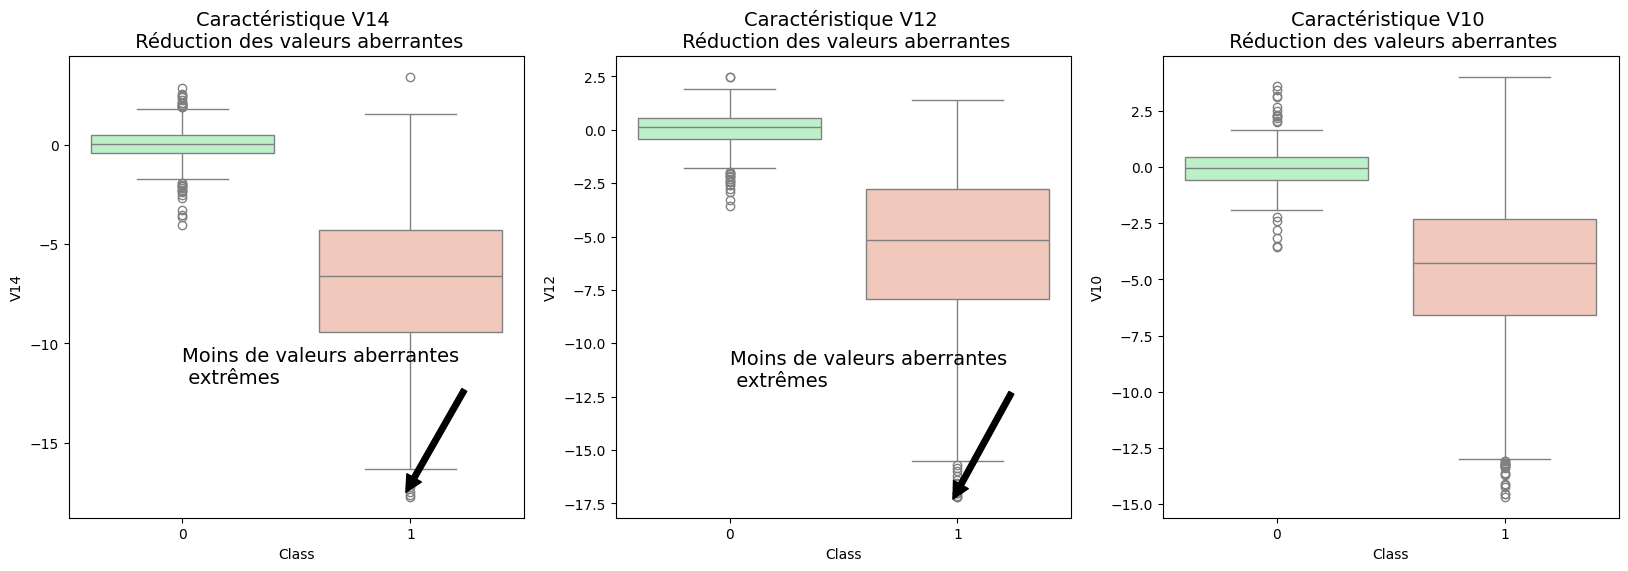

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

couleurs = ['#B3F9C5', '#f9c5b3']
# Boxplots avec les valeurs aberrantes supprimées
# Caractéristique V14
sns.boxplot(x="Class", y="V14", data=nouveau_df, ax=ax1, palette=couleurs)
ax1.set_title("Caractéristique V14 \n Réduction des valeurs aberrantes", fontsize=14)
ax1.annotate('Moins de valeurs aberrantes \n extrêmes', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Caractéristique V12
sns.boxplot(x="Class", y="V12", data=nouveau_df, ax=ax2, palette=couleurs)
ax2.set_title("Caractéristique V12 \n Réduction des valeurs aberrantes", fontsize=14)
ax2.annotate('Moins de valeurs aberrantes \n extrêmes', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Caractéristique V10
sns.boxplot(x="Class", y="V10", data=nouveau_df, ax=ax3, palette=couleurs)
ax3.set_title("Caractéristique V10 \n Réduction des valeurs aberrantes", fontsize=14)
ax3.annotate('Moins de valeurs aberrantes \n extrêmes', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()


In [47]:
# Sélection des transactions frauduleuses et non frauduleuses
transactions_frauduleuses = df[df['Class'] == 1]
transactions_non_frauduleuses = df[df['Class'] == 0]

# Sélectionner un nombre égal d'échantillons aléatoires des deux classes
nombre_echantillons = min(len(transactions_frauduleuses), len(transactions_non_frauduleuses))
echantillon_frauduleux = transactions_frauduleuses.sample(n=nombre_echantillons, random_state=42)
echantillon_non_frauduleux = transactions_non_frauduleuses.sample(n=nombre_echantillons, random_state=42)

# Concaténer les deux échantillons pour créer le nouveau DataFrame équilibré
nouveau_df = pd.concat([echantillon_frauduleux, echantillon_non_frauduleux])

# Mélanger les lignes du DataFrame pour mélanger les classes
nouveau_df = nouveau_df.sample(frac=1, random_state=42)

# Afficher les informations sur la distribution des classes
print('Distribution des classes dans le nouveau DataFrame :')
print(nouveau_df['Class'].value_counts())

# Afficher les premières lignes du nouveau DataFrame
print(nouveau_df.head())


Distribution des classes dans le nouveau DataFrame :
Class
0    492
1    492
Name: count, dtype: int64
        scaled_amount  scaled_time        V1        V2         V3        V4  \
239685      34.625865     0.769816 -3.882566 -7.723979  -5.268533  0.085258   
221041      -0.279466     0.678074 -1.172183  1.661713  -3.049637  2.555058   
283898       0.807657     1.025376 -1.438428 -1.023314  -0.473383 -2.081712   
6472        -0.293440    -0.904052  1.023874  2.001485  -4.769752  3.819195   
44091        1.089779    -0.504012 -7.222731  6.155773 -10.826460  4.180779   

              V5        V6        V7        V8  ...       V20       V21  \
239685 -1.804451 -0.339520  2.982865 -3.852357  ...  5.476430  0.857012   
221041  3.669035 -3.162998 -5.985640 -2.179935  ...  0.548106 -0.812098   
283898  0.659606 -1.257538 -0.247094  0.432097  ...  0.505404  0.768094   
6472   -1.271754 -1.734662 -3.059245  0.889805  ...  0.204138  0.343283   
44091  -6.123555 -3.114136 -6.895112  5.161516 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Sous-échantillonnage avant la validation croisée (sujet au surajustement)
X = nouveau_df.drop('Class', axis=1)
y = nouveau_df['Class']

# Ceci est explicitement utilisé pour le sous-échantillonnage.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformer les valeurs en tableau pour alimenter les algorithmes de classification.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Implémentons des classificateurs simples

classificateurs = {
    "Régression logistique": LogisticRegression(),
    "KPlusProchesVoisins": KNeighborsClassifier(),
    "Classificateur de vecteur de support": SVC(),
}

# Wow, nos scores sont encore plus élevés même lors de l'application de la validation croisée.

for nom, classificateur in classificateurs.items():
    classificateur.fit(X_train, y_train)
    score_entrainement = cross_val_score(classificateur, X_train, y_train, cv=5)
    print("Classificateur: ", classificateur.__class__.__name__, "a un score d'entraînement de", round(score_entrainement.mean()*100, 10), "% de précision")


Classificateur:  LogisticRegression a un score d'entraînement de 94.2796097718 % de précision
Classificateur:  KNeighborsClassifier a un score d'entraînement de 94.0288639845 % de précision
Classificateur:  SVC a un score d'entraînement de 93.6450858663 % de précision


In [49]:
# Utilisation de GridSearchCV pour trouver les meilleurs paramètres.
from sklearn.model_selection import GridSearchCV

# Régression logistique
parametres_reg_log = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_reg_log = GridSearchCV(LogisticRegression(), parametres_reg_log)
grid_reg_log.fit(X_train, y_train)
# Nous obtenons automatiquement la régression logistique avec les meilleurs paramètres.
reg_log = grid_reg_log.best_estimator_

# KNeighborsClassifier
parametres_knears = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), parametres_knears)
grid_knears.fit(X_train, y_train)
# Meilleur estimateur KNears
voisins_kplusproches = grid_knears.best_estimator_

# Support Vector Classifier
parametres_svc = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), parametres_svc)
grid_svc.fit(X_train, y_train)

# Meilleur estimateur SVC
svc = grid_svc.best_estimator_

# Classifier Arbre de décision
parametres_arbre = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)), 
              "min_samples_leaf": list(range(5, 7, 1))}
grid_arbre = GridSearchCV(DecisionTreeClassifier(), parametres_arbre)
grid_arbre.fit(X_train, y_train)

# Meilleur estimateur d'arbre
arbre_clf = grid_arbre.best_estimator_


c:\Users\tmp_traore77581\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tmp_traore77581\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

In [50]:
# Cas de surajustement

score_reg_log = cross_val_score(reg_log, X_train, y_train, cv=5)
print('Score de validation croisée de la Régression logistique : ', round(score_reg_log.mean() * 100, 10).astype(str) + '%')

score_knears = cross_val_score(voisins_kplusproches, X_train, y_train, cv=5)
print('Score de validation croisée de KNeighbors Classifier :', round(score_knears.mean() * 100, 10).astype(str) + '%')

score_svc = cross_val_score(svc, X_train, y_train, cv=5)
print('Score de validation croisée du Support Vector Classifier :', round(score_svc.mean() * 100, 10).astype(str) + '%')

score_arbre = cross_val_score(arbre_clf, X_train, y_train, cv=5)
print('Score de validation croisée du Classifier Arbre de décision :', round(score_arbre.mean() * 100, 10).astype(str) + '%')


Score de validation croisée de la Régression logistique :  94.66338789%
Score de validation croisée de KNeighbors Classifier : 94.4069983069%
Score de validation croisée du Support Vector Classifier : 94.4069983069%
Score de validation croisée du Classifier Arbre de décision : 92.6300088688%


In [51]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# Définir sous_echantillon_X en supprimant la colonne 'Class' du DataFrame df
sous_echantillon_X = df.drop('Class', axis=1)

# Définir sous_echantillon_y en extrayant la colonne 'Class' du DataFrame df
sous_echantillon_y = df['Class']
# Créer une instance de NearMiss
nearmiss = NearMiss()

# Appliquer la méthode fit_resample
X_nearmiss, y_nearmiss = nearmiss.fit_resample(sous_echantillon_X.values, sous_echantillon_y.values)

# Vérifier la distribution des étiquettes
from collections import Counter
print('Distribution des étiquettes NearMiss : {}'.format(Counter(y_nearmiss)))

# Nous allons sous-échantillonner lors de la validation croisée
sous_echantillon_X = df.drop('Class', axis=1)
sous_echantillon_y = df['Class']

for train_index, test_index in sss.split(sous_echantillon_X, sous_echantillon_y):
    print("Entraînement :", train_index, "Test :", test_index)
    sous_echantillon_Xtrain, sous_echantillon_Xtest = sous_echantillon_X.iloc[train_index], sous_echantillon_X.iloc[test_index]
    sous_echantillon_ytrain, sous_echantillon_ytest = sous_echantillon_y.iloc[train_index], sous_echantillon_y.iloc[test_index]
    
sous_echantillon_Xtrain = sous_echantillon_Xtrain.values
sous_echantillon_Xtest = sous_echantillon_Xtest.values
sous_echantillon_ytrain = sous_echantillon_ytrain.values
sous_echantillon_ytest = sous_echantillon_ytest.values 

sous_echantillon_precision = []
sous_echantillon_rappel = []
sous_echantillon_f1 = []
sous_echantillon_auc = []

# Implémentation de la technique NearMiss
# Distribution de NearMiss (Juste pour voir comment il distribue les étiquettes, nous n'utiliserons pas ces variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(sous_echantillon_X.values, sous_echantillon_y.values)
print('Distribution des étiquettes NearMiss : {}'.format(Counter(y_nearmiss)))
# Validation croisée correct

for train, test in sss.split(sous_echantillon_Xtrain, sous_echantillon_ytrain):
    pipeline_sous_echantillon = make_imb_pipeline(NearMiss(sampling_strategy='majority'), reg_log) # SMOTE se produit pendant la validation croisée, pas avant..
    modele_sous_echantillon = pipeline_sous_echantillon.fit(sous_echantillon_Xtrain[train], sous_echantillon_ytrain[train])
    prediction_sous_echantillon = modele_sous_echantillon.predict(sous_echantillon_Xtrain[test])
    
    sous_echantillon_precision.append(precision_score(sous_echantillon_ytrain[test], prediction_sous_echantillon))
    sous_echantillon_rappel.append(recall_score(sous_echantillon_ytrain[test], prediction_sous_echantillon))
    sous_echantillon_f1.append(f1_score(sous_echantillon_ytrain[test], prediction_sous_echantillon))
    sous_echantillon_auc.append(roc_auc_score(sous_echantillon_ytrain[test], prediction_sous_echantillon))



Distribution des étiquettes NearMiss : Counter({0: 492, 1: 492})
Entraînement : [ 56022  56803  56808 ... 284804 284805 284806] Test : [    0     1     2 ... 56962 56963 56964]
Entraînement : [     0      1      2 ... 284804 284805 284806] Test : [ 56022  56803  56808 ... 116312 119033 119415]
Entraînement : [     0      1      2 ... 284804 284805 284806] Test : [113918 113919 113920 ... 179532 179732 180205]
Entraînement : [     0      1      2 ... 284804 284805 284806] Test : [170869 170870 170871 ... 227843 229050 229236]
Entraînement : [     0      1      2 ... 227843 229050 229236] Test : [227844 227845 227846 ... 284804 284805 284806]
Distribution des étiquettes NearMiss : Counter({0: 492, 1: 492})


In [52]:
# Traçons la courbe d'apprentissage pour la Régression Logistique
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Premier Estimateur
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score d'entraînement")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de validation croisée")
    ax1.set_title("Courbe d'apprentissage de la Régression Logistique", fontsize=14)
    ax1.set_xlabel('Taille de l\'entraînement (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Deuxième Estimateur
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score d'entraînement")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de validation croisée")
    ax2.set_title("Courbe d'apprentissage de K plus proches voisins", fontsize=14)
    ax2.set_xlabel('Taille de l\'entraînement (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Troisième Estimateur
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score d'entraînement")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de validation croisée")
    ax3.set_title("Courbe d'apprentissage du Classificateur de vecteurs de support", fontsize=14)
    ax3.set_xlabel('Taille de l\'entraînement (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Quatrième Estimateur
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Score d'entraînement")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Score de validation croisée")
    ax4.set_title("Courbe d'apprentissage de l'Arbre de décision", fontsize=14)
    ax4.set_xlabel('Taille de l\'entraînement (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'c:\\Users\\tmp_traore77581\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

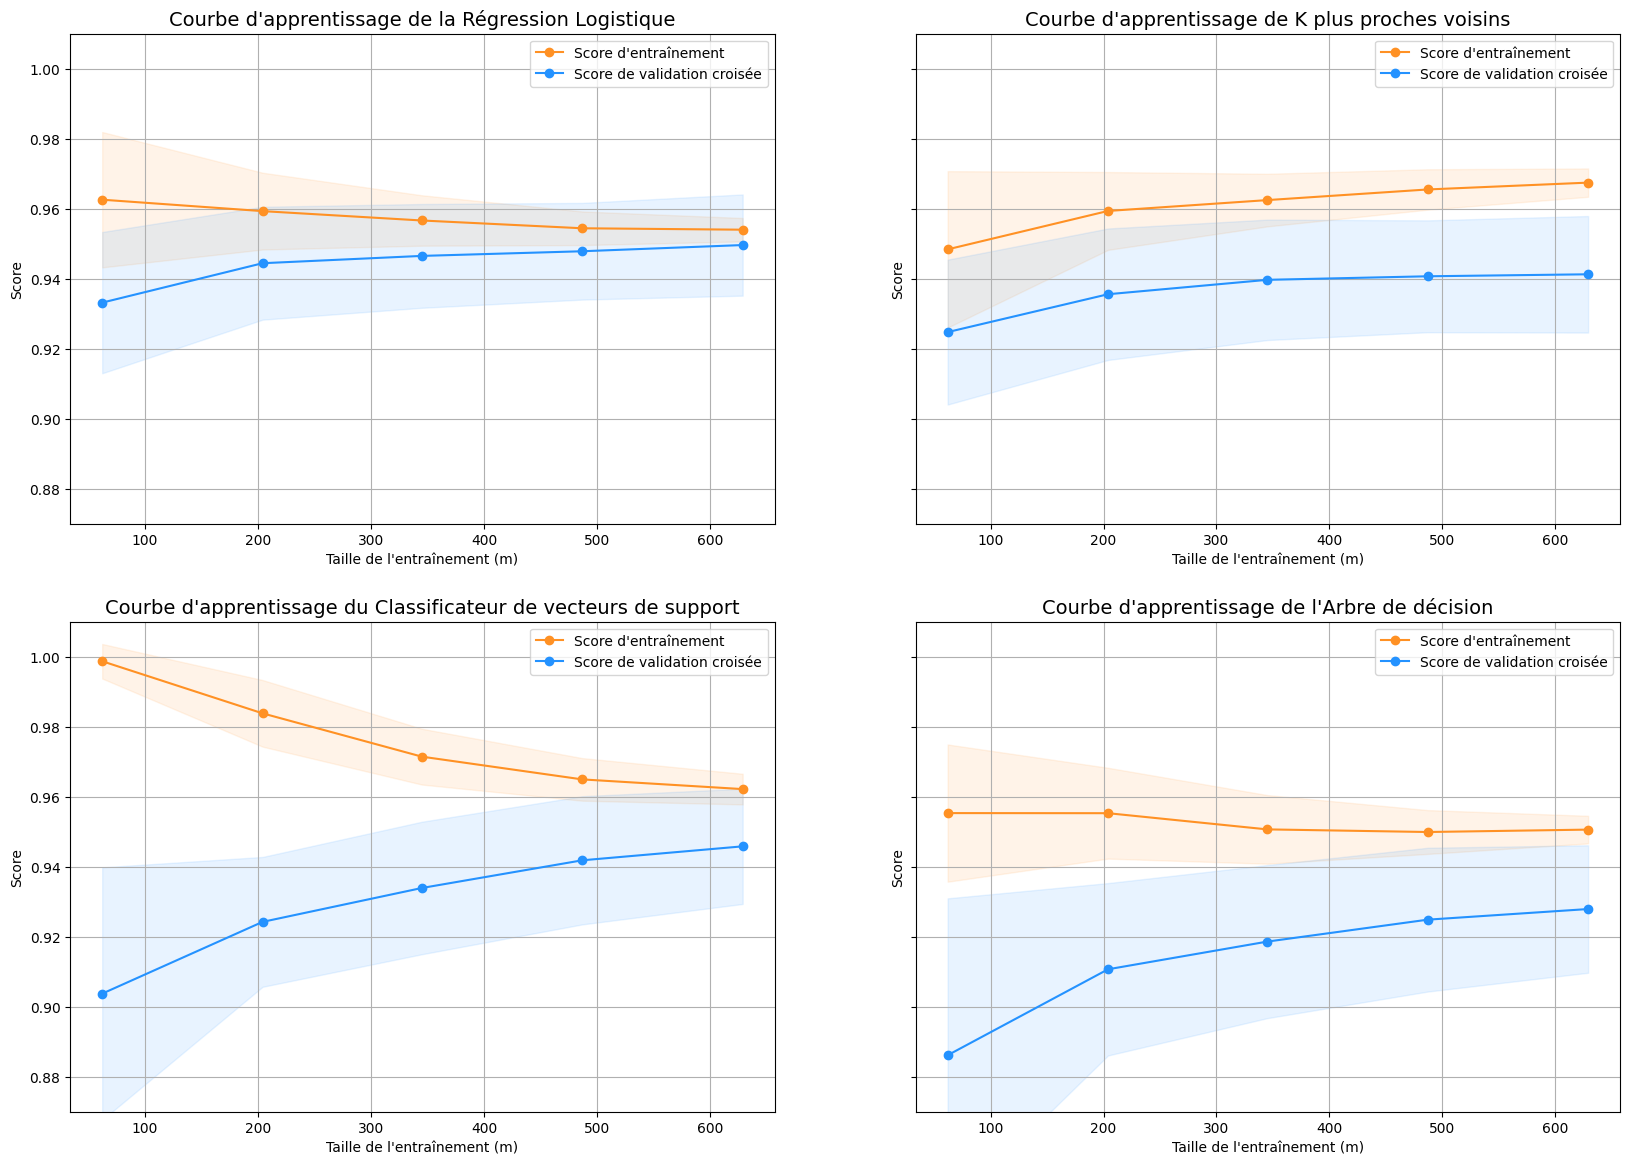

In [53]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(reg_log, voisins_kplusproches, svc, arbre_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
